In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.linear_model as lm
import joblib
from matplotlib.font_manager import FontProperties
from tqdm import tqdm
import math

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
data_df1=pd.read_excel(r'D:\chengba_faultszone\zoneB/cb_zone2_la.xls')
data_df0=pd.read_excel(r'D:\chengba_faultszone\zoneB/cb_zone2_non_la_new.xls')

In [4]:
data_df1

,OBJECTID,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1,1061.608383,1090.940577,5039.704047,1069,47,32.397900,233.746002,-3.840570,-1.482960,2.357610,3.85601,19.037069,90,0.867997,667,5643,122,0.50
1,2,1830.908778,212.839915,448.116378,937,38,20.552099,146.128998,1.512950,1.129790,-0.383162,4.38224,11.247650,81,0.891963,686,5410,109,0.25
2,3,1496.401121,1561.816010,4963.979958,1233,28,21.663000,255.069000,-0.116381,-0.273812,-0.157431,4.32451,11.916037,93,0.886955,665,5667,157,0.50
3,4,1124.408237,1068.914597,3923.152933,1320,49,25.048000,205.395996,1.745710,1.275200,-0.470516,4.85507,28.039713,101,0.830373,665,5669,157,0.50
4,5,1456.673483,1419.744260,3966.552657,1341,27,18.078600,289.855011,0.465524,0.462335,-0.003189,5.61933,29.379349,99,0.886715,664,5694,157,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,255,4439.231856,1435.544114,2059.546049,1537,101,58.797798,158.005997,-0.581904,0.489889,1.071790,2.55321,35.024071,86,0.904803,667,5254,158,0.50
255,256,1950.710707,2948.850001,3508.303929,1802,59,28.515100,227.544998,0.814666,0.554757,-0.259909,3.66472,11.525058,93,0.909598,803,5241,158,0.50
256,257,1338.303413,570.187390,2010.180405,1112,23,15.494100,89.118599,3.142280,0.878025,-2.264260,4.66855,8.447250,100,0.894222,665,5261,159,0.50
257,258,1805.838129,1315.523558,2959.458917,1125,54,40.780300,284.311005,-3.375050,-1.707360,1.667680,3.54903,25.877282,96,0.881588,666,5217,115,0.25


In [5]:
data_df0

,OBJECTID,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1,5723.937338,1813.812396,5783.511477,2226,22,14.985000,67.520599,0.349143,0.798435,0.449292,4.71920,8.030086,98,0.897711,864,4927,122,0.25
1,2,5562.053802,1807.019703,6028.654634,2074,56,30.516600,37.947701,0.349143,-0.035396,-0.384539,4.96951,50.015197,92,0.910701,865,4927,122,0.25
2,3,6021.852810,1922.448205,5027.947278,2264,50,36.690701,354.746002,-1.978470,-1.525630,0.452846,3.34883,15.806462,92,0.916140,864,4927,157,0.50
3,4,5252.030072,1827.104440,6439.078381,1910,57,38.054798,29.357800,-0.698285,-1.049450,-0.351168,3.29947,16.606267,79,0.913449,865,4927,113,0.00
4,5,5414.847944,1624.538966,5916.754204,1985,49,28.229799,46.287300,-2.094860,-0.425482,1.669370,4.02321,16.105963,81,0.962264,865,4960,122,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,7275,1436.076719,6561.836802,7657.507661,2089,70,44.996899,188.337006,2.444000,-0.238895,-2.682890,3.40131,29.996765,81,0.905258,815,5008,114,0.25
7275,7276,2201.954604,6526.721686,7967.772977,1858,39,28.481001,69.285797,0.581904,-1.260230,-1.842140,4.01272,16.275781,93,0.917328,818,4965,122,0.25
7276,7277,2382.058548,6880.320619,8275.547560,1756,37,18.462799,24.928499,-0.349143,-0.219070,0.130073,7.75629,260.420763,90,0.922916,819,4972,109,0.25
7277,7278,2447.938728,6877.851192,8301.499596,1725,49,32.645401,11.908300,-4.888000,-2.499060,2.388940,3.49991,13.590106,93,0.915532,819,4935,109,0.25


In [6]:
data_df0_use=data_df0[['Dis. from faults','Dis. from rivers','Dis. from roads','Elevation','RDLS','Slope','Aspect','Curvature','Plan Curvature','Profile Curvature','TWI','SPI','Soil thickness','NDVI','Aridity','IM','GDP','HAI']].dropna().reset_index()

In [7]:
data_df0_use

,index,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,0,5723.937338,1813.812396,5783.511477,2226,22,14.985000,67.520599,0.349143,0.798435,0.449292,4.71920,8.030086,98,0.897711,864,4927,122,0.25
1,1,5562.053802,1807.019703,6028.654634,2074,56,30.516600,37.947701,0.349143,-0.035396,-0.384539,4.96951,50.015197,92,0.910701,865,4927,122,0.25
2,2,6021.852810,1922.448205,5027.947278,2264,50,36.690701,354.746002,-1.978470,-1.525630,0.452846,3.34883,15.806462,92,0.916140,864,4927,157,0.50
3,3,5252.030072,1827.104440,6439.078381,1910,57,38.054798,29.357800,-0.698285,-1.049450,-0.351168,3.29947,16.606267,79,0.913449,865,4927,113,0.00
4,4,5414.847944,1624.538966,5916.754204,1985,49,28.229799,46.287300,-2.094860,-0.425482,1.669370,4.02321,16.105963,81,0.962264,865,4960,122,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,7274,1436.076719,6561.836802,7657.507661,2089,70,44.996899,188.337006,2.444000,-0.238895,-2.682890,3.40131,29.996765,81,0.905258,815,5008,114,0.25
7275,7275,2201.954604,6526.721686,7967.772977,1858,39,28.481001,69.285797,0.581904,-1.260230,-1.842140,4.01272,16.275781,93,0.917328,818,4965,122,0.25
7276,7276,2382.058548,6880.320619,8275.547560,1756,37,18.462799,24.928499,-0.349143,-0.219070,0.130073,7.75629,260.420763,90,0.922916,819,4972,109,0.25
7277,7277,2447.938728,6877.851192,8301.499596,1725,49,32.645401,11.908300,-4.888000,-2.499060,2.388940,3.49991,13.590106,93,0.915532,819,4935,109,0.25


In [8]:
data_df1_use=data_df1[['Dis. from faults','Dis. from rivers','Dis. from roads','Elevation','RDLS','Slope','Aspect','Curvature','Plan Curvature','Profile Curvature','TWI','SPI','Soil thickness','NDVI','Aridity','IM','GDP','HAI']].dropna().reset_index().drop(columns=['index'])

In [9]:
data_df1_use

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1061.608383,1090.940577,5039.704047,1069,47,32.397900,233.746002,-3.840570,-1.482960,2.357610,3.85601,19.037069,90,0.867997,667,5643,122,0.50
1,1830.908778,212.839915,448.116378,937,38,20.552099,146.128998,1.512950,1.129790,-0.383162,4.38224,11.247650,81,0.891963,686,5410,109,0.25
2,1496.401121,1561.816010,4963.979958,1233,28,21.663000,255.069000,-0.116381,-0.273812,-0.157431,4.32451,11.916037,93,0.886955,665,5667,157,0.50
3,1124.408237,1068.914597,3923.152933,1320,49,25.048000,205.395996,1.745710,1.275200,-0.470516,4.85507,28.039713,101,0.830373,665,5669,157,0.50
4,1456.673483,1419.744260,3966.552657,1341,27,18.078600,289.855011,0.465524,0.462335,-0.003189,5.61933,29.379349,99,0.886715,664,5694,157,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4439.231856,1435.544114,2059.546049,1537,101,58.797798,158.005997,-0.581904,0.489889,1.071790,2.55321,35.024071,86,0.904803,667,5254,158,0.50
255,1950.710707,2948.850001,3508.303929,1802,59,28.515100,227.544998,0.814666,0.554757,-0.259909,3.66472,11.525058,93,0.909598,803,5241,158,0.50
256,1338.303413,570.187390,2010.180405,1112,23,15.494100,89.118599,3.142280,0.878025,-2.264260,4.66855,8.447250,100,0.894222,665,5261,159,0.50
257,1805.838129,1315.523558,2959.458917,1125,54,40.780300,284.311005,-3.375050,-1.707360,1.667680,3.54903,25.877282,96,0.881588,666,5217,115,0.25


In [10]:
data_df1_use['label']=1

In [11]:
data_df1_use

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI,label
0,1061.608383,1090.940577,5039.704047,1069,47,32.397900,233.746002,-3.840570,-1.482960,2.357610,3.85601,19.037069,90,0.867997,667,5643,122,0.50,1
1,1830.908778,212.839915,448.116378,937,38,20.552099,146.128998,1.512950,1.129790,-0.383162,4.38224,11.247650,81,0.891963,686,5410,109,0.25,1
2,1496.401121,1561.816010,4963.979958,1233,28,21.663000,255.069000,-0.116381,-0.273812,-0.157431,4.32451,11.916037,93,0.886955,665,5667,157,0.50,1
3,1124.408237,1068.914597,3923.152933,1320,49,25.048000,205.395996,1.745710,1.275200,-0.470516,4.85507,28.039713,101,0.830373,665,5669,157,0.50,1
4,1456.673483,1419.744260,3966.552657,1341,27,18.078600,289.855011,0.465524,0.462335,-0.003189,5.61933,29.379349,99,0.886715,664,5694,157,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4439.231856,1435.544114,2059.546049,1537,101,58.797798,158.005997,-0.581904,0.489889,1.071790,2.55321,35.024071,86,0.904803,667,5254,158,0.50,1
255,1950.710707,2948.850001,3508.303929,1802,59,28.515100,227.544998,0.814666,0.554757,-0.259909,3.66472,11.525058,93,0.909598,803,5241,158,0.50,1
256,1338.303413,570.187390,2010.180405,1112,23,15.494100,89.118599,3.142280,0.878025,-2.264260,4.66855,8.447250,100,0.894222,665,5261,159,0.50,1
257,1805.838129,1315.523558,2959.458917,1125,54,40.780300,284.311005,-3.375050,-1.707360,1.667680,3.54903,25.877282,96,0.881588,666,5217,115,0.25,1


In [12]:
def shuf(i,n):
    i=shuffle(i[['Dis. from faults','Dis. from rivers','Dis. from roads','Elevation','RDLS','Slope','Aspect','Curvature','Plan Curvature','Profile Curvature','TWI','SPI','Soil thickness','NDVI','Aridity','IM','GDP','HAI']],random_state=42).dropna().reset_index().drop(columns=['index'])[:1*len(n)]
    return i

In [13]:
data0_df_unhp=shuf(data_df0_use,data_df1_use)

In [14]:
data0_df_unhp

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1069.373074,1588.941944,1775.653587,1176,34,17.402100,194.981995,2.444000,1.629330,-0.814666,6.00659,39.891983,91,0.892151,635,6083,112,0.25
1,5353.894063,213.212690,251.309046,1200,34,19.102501,307.998993,-0.814666,-0.732541,0.082125,7.79376,290.917866,92,0.886544,756,6358,112,0.50
2,3621.992990,103.546160,8946.926698,1566,51,34.038601,52.696098,-0.232762,0.124244,0.357006,3.44694,14.329291,72,0.845903,854,4735,154,0.50
3,2782.474639,875.607925,985.133802,1073,18,12.890100,206.565002,-0.465524,-0.418971,0.046552,6.13876,24.272991,99,0.826289,624,6424,158,0.50
4,3012.327173,1469.003726,1580.766261,1626,47,32.028599,168.996002,0.349143,0.465524,0.116381,3.87030,18.766930,89,0.902345,620,6533,140,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,3248.927381,4375.780344,4351.886858,1608,32,24.067301,169.548004,-2.444000,-1.410950,1.033050,4.20721,13.399093,89,0.915569,866,4699,105,0.25
255,1728.848965,878.883662,983.615573,819,53,35.848999,7.460570,-0.465524,0.232762,0.698285,3.37963,15.327050,97,0.860479,651,5930,110,0.25
256,1801.832168,311.815599,6552.968144,1100,50,30.225401,250.768997,-0.581904,-0.332333,0.249571,3.94144,17.478241,96,0.859135,663,5545,159,0.50
257,5569.720361,787.818288,4642.261827,1630,49,35.166901,260.595001,0.465524,0.501834,0.036311,3.75138,21.136716,91,0.903463,758,6342,109,0.25


In [15]:
data0_df_unhp['label']=0

In [16]:
data0_df_unhp

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI,label
0,1069.373074,1588.941944,1775.653587,1176,34,17.402100,194.981995,2.444000,1.629330,-0.814666,6.00659,39.891983,91,0.892151,635,6083,112,0.25,0
1,5353.894063,213.212690,251.309046,1200,34,19.102501,307.998993,-0.814666,-0.732541,0.082125,7.79376,290.917866,92,0.886544,756,6358,112,0.50,0
2,3621.992990,103.546160,8946.926698,1566,51,34.038601,52.696098,-0.232762,0.124244,0.357006,3.44694,14.329291,72,0.845903,854,4735,154,0.50,0
3,2782.474639,875.607925,985.133802,1073,18,12.890100,206.565002,-0.465524,-0.418971,0.046552,6.13876,24.272991,99,0.826289,624,6424,158,0.50,0
4,3012.327173,1469.003726,1580.766261,1626,47,32.028599,168.996002,0.349143,0.465524,0.116381,3.87030,18.766930,89,0.902345,620,6533,140,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,3248.927381,4375.780344,4351.886858,1608,32,24.067301,169.548004,-2.444000,-1.410950,1.033050,4.20721,13.399093,89,0.915569,866,4699,105,0.25,0
255,1728.848965,878.883662,983.615573,819,53,35.848999,7.460570,-0.465524,0.232762,0.698285,3.37963,15.327050,97,0.860479,651,5930,110,0.25,0
256,1801.832168,311.815599,6552.968144,1100,50,30.225401,250.768997,-0.581904,-0.332333,0.249571,3.94144,17.478241,96,0.859135,663,5545,159,0.50,0
257,5569.720361,787.818288,4642.261827,1630,49,35.166901,260.595001,0.465524,0.501834,0.036311,3.75138,21.136716,91,0.903463,758,6342,109,0.25,0


In [17]:
data_df=data0_df_unhp.append(data_df1_use)
data_df=shuffle(data_df).reset_index().drop(columns=['index'])

C:\Users\user\AppData\Local\Temp\ipykernel_21172\1135829550.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df=data0_df_unhp.append(data_df1_use)


In [18]:
data=data_df.iloc[:,:-1]
label=data_df.iloc[:,-1]
feat_labels=data_df.columns[:-1]

In [19]:
data

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1375.645583,412.403435,477.135878,978,47,34.314800,287.075989,3.142280,2.636740,-0.505541,3.78314,20.475977,97,0.863295,623,6434,114,0.50
1,1693.911952,1312.699474,1323.207338,1049,49,37.275902,172.595993,-1.512950,-1.803880,-0.290925,3.67415,22.833966,86,0.787410,650,5916,114,0.25
2,1489.772909,875.575345,1243.876256,1478,35,27.293800,270.473999,-2.676760,0.245846,2.922610,6.14228,123.840375,98,0.887456,854,5103,120,0.25
3,6184.027965,3714.062858,5414.152367,2092,47,27.961000,156.317993,-1.047430,-0.095843,0.951585,5.98041,111.475620,91,0.912872,777,5855,114,0.25
4,1573.577450,2112.045114,6375.983566,2503,43,27.913401,22.229601,-0.698285,-0.328810,0.369475,3.68993,11.238188,90,0.900452,1335,4805,118,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2466.020948,1660.978110,8288.285036,1864,47,31.454901,125.351997,2.444000,0.684621,-1.759380,3.89268,18.351589,92,0.921030,849,4807,106,0.25
514,1137.459644,1809.178576,7808.452060,1375,47,29.601000,125.837997,-1.629330,-0.085951,1.543380,3.96665,17.043030,98,0.867222,660,5598,110,0.25
515,3236.331642,1007.269722,1118.925173,1478,51,34.509399,148.182999,0.232762,0.052981,-0.179780,3.42928,14.584569,83,0.916557,746,6641,108,0.25
516,1974.139155,3456.572811,5736.855250,1619,111,58.320999,157.078995,-3.258660,-2.488120,0.770543,2.57191,34.375322,87,0.903899,777,6121,115,0.25


In [20]:
new_column_names = ["F1", "F2", "F3", "F4", "F5",
                    "F6", "F7", "F8", "F9", "F10",
                    "F11", "F12", "F13", "F14", "F15", 
                    "F16", "F17", "F18"]
data.columns = new_column_names

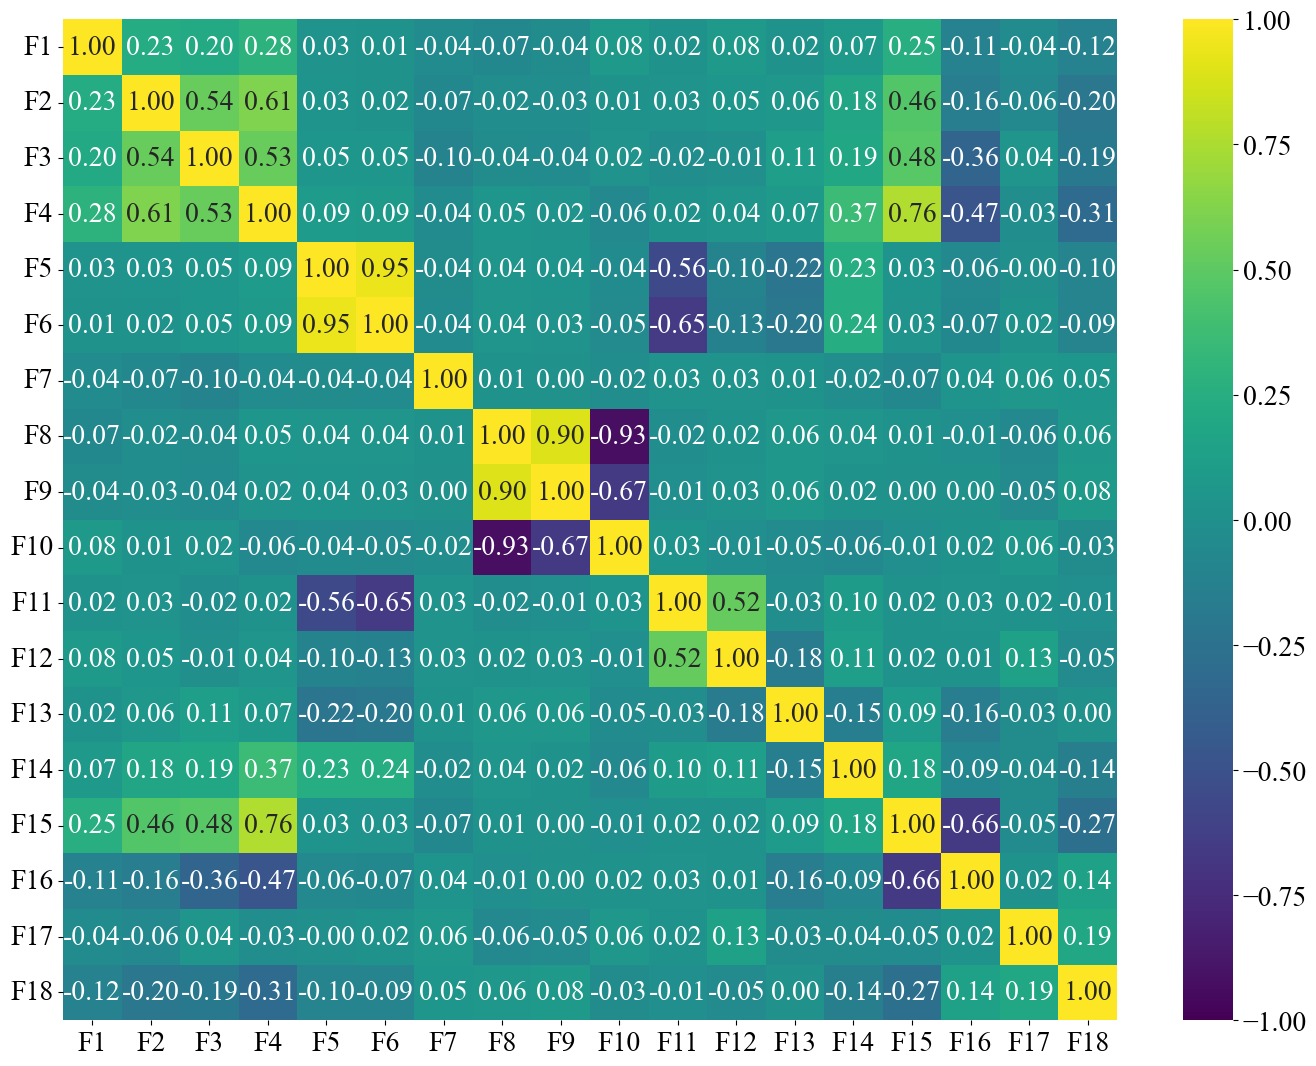

In [21]:
f = data.corr()
plt.figure(figsize=(17,13))
heatmap=sns.heatmap(f, annot=True,annot_kws={'size': 20},fmt=".2f", vmin=-1, vmax=1,cmap="viridis")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.savefig(r'D:\FIG/ZoneB.png')

In [22]:
new_column_names = ["Dis. from faults", "Dis. from rivers", "Dis. from roads", "Elevation", "RDLS",
                    "Slope", "Aspect", "Curvature", "Plan Curvature", "Profile Curvature",
                    "TWI", "SPI", "Soil thickness", "NDVI", "Aridity", 
                    "IM", "GDP", "HAI"]
data.columns = new_column_names

In [23]:
data

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1375.645583,412.403435,477.135878,978,47,34.314800,287.075989,3.142280,2.636740,-0.505541,3.78314,20.475977,97,0.863295,623,6434,114,0.50
1,1693.911952,1312.699474,1323.207338,1049,49,37.275902,172.595993,-1.512950,-1.803880,-0.290925,3.67415,22.833966,86,0.787410,650,5916,114,0.25
2,1489.772909,875.575345,1243.876256,1478,35,27.293800,270.473999,-2.676760,0.245846,2.922610,6.14228,123.840375,98,0.887456,854,5103,120,0.25
3,6184.027965,3714.062858,5414.152367,2092,47,27.961000,156.317993,-1.047430,-0.095843,0.951585,5.98041,111.475620,91,0.912872,777,5855,114,0.25
4,1573.577450,2112.045114,6375.983566,2503,43,27.913401,22.229601,-0.698285,-0.328810,0.369475,3.68993,11.238188,90,0.900452,1335,4805,118,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2466.020948,1660.978110,8288.285036,1864,47,31.454901,125.351997,2.444000,0.684621,-1.759380,3.89268,18.351589,92,0.921030,849,4807,106,0.25
514,1137.459644,1809.178576,7808.452060,1375,47,29.601000,125.837997,-1.629330,-0.085951,1.543380,3.96665,17.043030,98,0.867222,660,5598,110,0.25
515,3236.331642,1007.269722,1118.925173,1478,51,34.509399,148.182999,0.232762,0.052981,-0.179780,3.42928,14.584569,83,0.916557,746,6641,108,0.25
516,1974.139155,3456.572811,5736.855250,1619,111,58.320999,157.078995,-3.258660,-2.488120,0.770543,2.57191,34.375322,87,0.903899,777,6121,115,0.25


In [24]:
label

0      0
1      1
2      0
3      0
4      0
      ..
513    0
514    0
515    1
516    1
517    1
Name: label, Length: 518, dtype: int64

In [25]:
feat_labels

Index(['Dis. from faults', 'Dis. from rivers', 'Dis. from roads', 'Elevation',
       'RDLS', 'Slope', 'Aspect', 'Curvature', 'Plan Curvature',
       'Profile Curvature', 'TWI', 'SPI', 'Soil thickness', 'NDVI', 'Aridity',
       'IM', 'GDP', 'HAI'],
      dtype='object')

In [30]:
num_iterations = 100
all_auc_lists = []
iteration_auc_dict = {}
iteration_auc_mean = {}
for iteration in tqdm(range(num_iterations),desc="Processing", unit="iteration"):
    kf = KFold(n_splits=10, shuffle=True, random_state=42 + iteration)
    auc_list = []
    for fold, (train_indices, val_indices) in enumerate(kf.split(data, label)):
        Xtrain, Ytrain = data.iloc[train_indices], label[train_indices]
        Xtest, Ytest = data.iloc[val_indices], label[val_indices]
        rfc=RandomForestClassifier(random_state=42 + iteration,criterion='gini',max_depth=16,n_estimators=50,max_features=10)
        rfc.fit(Xtrain, Ytrain)
        Ypred = rfc.predict(Xtest)
        score = rfc.predict_proba(Xtest)[:, 1]
        fpr, tpr, _ = roc_curve(Ytest, score)
        roc_auc = auc(fpr, tpr)
        auc_list.append(roc_auc)
    all_auc_lists.append(auc_list)
    iteration_auc_dict[iteration] = auc_list
    iteration_auc_mean[iteration] = np.mean(auc_list)
average_aucs = [np.mean(auc_list) for auc_list in all_auc_lists]
best_iteration = np.argmax(average_aucs)   
best_rfc = RandomForestClassifier(random_state=42 + best_iteration, criterion='gini', max_depth=16, n_estimators=50, max_features=10)

Processing: 100%|█████████████████████████████████████████████████████████████| 100/100 [03:23<00:00,  2.04s/iteration]


In [31]:
iteration_auc_dict

{0: [0.7711323763955342,
  0.8177083333333334,
  0.8681481481481481,
  0.890625,
  0.8223388305847077,
  0.7706146926536732,
  0.7609375,
  0.9446969696969697,
  0.7907523510971787,
  0.7238461538461538],
 1: [0.7150537634408601,
  0.8542899408284025,
  0.7574404761904763,
  0.8341013824884792,
  0.7422222222222222,
  0.8683431952662721,
  0.8185907046476762,
  0.7757575757575756,
  0.8665123456790124,
  0.78],
 2: [0.7096296296296296,
  0.7961019490254873,
  0.9077380952380952,
  0.8463901689708141,
  0.8556547619047619,
  0.760119940029985,
  0.8530303030303031,
  0.7398437499999999,
  0.8392857142857143,
  0.8128881987577639],
 3: [0.931060606060606,
  0.8110047846889951,
  0.7098950524737632,
  0.7511520737327189,
  0.8232248520710059,
  0.7092013888888888,
  0.9535232383808095,
  0.7803598200899551,
  0.7530864197530863,
  0.7288401253918496],
 4: [0.8700159489633172,
  0.7745535714285714,
  0.8583333333333334,
  0.841715976331361,
  0.8018433179723502,
  0.8620689655172414,
  0.8

In [32]:
iteration_auc_mean

{0: 0.8160800355755699,
 1: 0.8012311606520977,
 2: 0.8120682510872553,
 3: 0.7951348361531678,
 4: 0.8082381880470406,
 5: 0.8105178622155547,
 6: 0.8072008721305887,
 7: 0.8042425375333838,
 8: 0.8021757101354134,
 9: 0.7997578908056794,
 10: 0.8032840743116194,
 11: 0.8055510362932612,
 12: 0.8035630438426178,
 13: 0.8137803201253956,
 14: 0.7961359769925643,
 15: 0.7984649685992172,
 16: 0.7939232717821246,
 17: 0.8122612397572588,
 18: 0.8013372997273098,
 19: 0.7977238219827358,
 20: 0.7949511887952992,
 21: 0.8082619465637733,
 22: 0.8148587596795872,
 23: 0.7948864893648228,
 24: 0.8127498158609093,
 25: 0.7866882335141889,
 26: 0.8051492914063557,
 27: 0.7955966400684142,
 28: 0.7961044454422656,
 29: 0.8116734706380786,
 30: 0.812218242258794,
 31: 0.8072746039636526,
 32: 0.8139476279360782,
 33: 0.8044758007123469,
 34: 0.8074643224358944,
 35: 0.8130827835957147,
 36: 0.81591613045776,
 37: 0.8157401102636908,
 38: 0.8084616067837894,
 39: 0.7985458776760386,
 40: 0.797171

In [33]:
best_rfc

RandomForestClassifier(max_depth=16, max_features=10, n_estimators=50,
                       random_state=103)

In [34]:
best_iteration

61

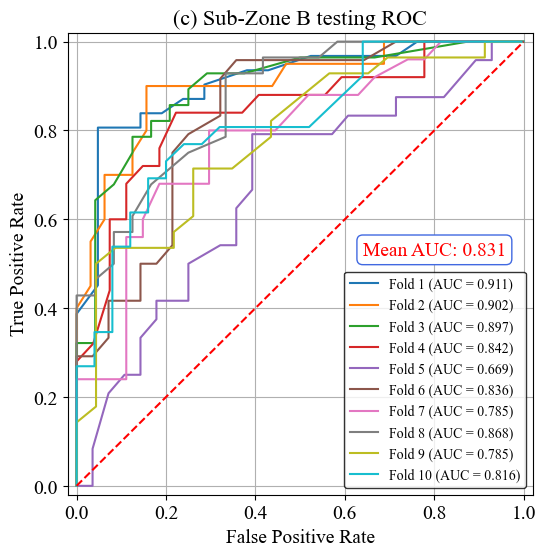

In [35]:
plt.figure(figsize=(6, 6))
plt.title('(c) Sub-Zone B testing ROC',fontsize=16)
auc_list_best = []
accuracy_list_best = []
precision_list_best = []
recall_list_best = []
f1_list_best = []

mean_cm = np.zeros((2, 2), dtype=int)

kf_best = KFold(n_splits=10, shuffle=True, random_state=42 + best_iteration)
for fold, (train_indices, val_indices) in enumerate(kf_best.split(data, label)):
    Xtrain, Ytrain = data.iloc[train_indices], label[train_indices]
    Xtest, Ytest = data.iloc[val_indices], label[val_indices]
    rfc_best = RandomForestClassifier(random_state=42 + best_iteration, criterion='gini', max_depth=16, n_estimators=50, max_features=10)
    rfc_best.fit(Xtrain, Ytrain)
    Ypred = rfc_best.predict(Xtest)
    score_best = rfc_best.predict_proba(Xtest)[:, 1]
    fpr_best, tpr_best, _ = roc_curve(Ytest, score_best)
    roc_auc_best = auc(fpr_best, tpr_best)
    auc_list_best.append(roc_auc_best)

    accuracy = accuracy_score(Ytest, Ypred)
    precision = precision_score(Ytest, Ypred)
    recall = recall_score(Ytest, Ypred)
    f1 = f1_score(Ytest, Ypred)
    
    cm=confusion_matrix(Ytest, Ypred)
    mean_cm += cm
    
    accuracy_list_best.append(accuracy)
    precision_list_best.append(precision)
    recall_list_best.append(recall)
    f1_list_best.append(f1)
    
    plt.plot(fpr_best, tpr_best, label=f'Fold {fold+1} (AUC = {roc_auc_best:.3f})')

average_auc = sum(auc_list_best) / 10
average_accuracy = sum(accuracy_list_best) / 10
average_precision = sum(precision_list_best) / 10
average_recall = sum(recall_list_best) / 10
average_f1 = sum(f1_list_best) / 10
mean_conf_matrix = mean_cm // 10

plt.text(0.64, 0.52, f'Mean AUC: {average_auc:.3f}',color='r', fontsize=14,bbox=dict(facecolor='white', edgecolor='RoyalBlue', boxstyle='round,pad=0.3'))


plt.legend(loc='lower right',frameon=True, fancybox=True, edgecolor='black')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig(r'D:\FIG/Sub-Zone B-ROC.png')
plt.show()

In [36]:
print(f'Mean AUC: {average_auc:.3f}')
print(f'Mean Accuracy: {average_accuracy:.3f}')
print(f'Mean Precision: {average_precision:.3f}')
print(f'Mean Recall: {average_recall:.3f}')
print(f'Mean F1: {average_f1:.3f}')

Mean AUC: 0.831
Mean Accuracy: 0.749
Mean Precision: 0.764
Mean Recall: 0.726
Mean F1: 0.740


In [37]:
mean_cm

array([[200,  59],
       [ 71, 188]])

In [38]:
mean_conf_matrix

array([[20,  5],
       [ 7, 18]], dtype=int32)

In [40]:
importances=rfc_best.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(Xtrain.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Aridity                        0.181501
 2) Elevation                      0.111960
 3) IM                             0.076327
 4) Aspect                         0.065823
 5) Dis. from roads                0.058656
 6) TWI                            0.055926
 7) GDP                            0.052292
 8) Dis. from faults               0.047413
 9) NDVI                           0.044630
10) Soil thickness                 0.041426
11) SPI                            0.040093
12) Dis. from rivers               0.039403
13) Plan Curvature                 0.039056
14) Profile Curvature              0.036995
15) Slope                          0.036890
16) RDLS                           0.034679
17) Curvature                      0.029339
18) HAI                            0.007591


In [41]:
Xtrain

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1375.645583,412.403435,477.135878,978,47,34.314800,287.075989,3.142280,2.636740,-0.505541,3.78314,20.475977,97,0.863295,623,6434,114,0.50
1,1693.911952,1312.699474,1323.207338,1049,49,37.275902,172.595993,-1.512950,-1.803880,-0.290925,3.67415,22.833966,86,0.787410,650,5916,114,0.25
2,1489.772909,875.575345,1243.876256,1478,35,27.293800,270.473999,-2.676760,0.245846,2.922610,6.14228,123.840375,98,0.887456,854,5103,120,0.25
3,6184.027965,3714.062858,5414.152367,2092,47,27.961000,156.317993,-1.047430,-0.095843,0.951585,5.98041,111.475620,91,0.912872,777,5855,114,0.25
4,1573.577450,2112.045114,6375.983566,2503,43,27.913401,22.229601,-0.698285,-0.328810,0.369475,3.68993,11.238188,90,0.900452,1335,4805,118,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2466.020948,1660.978110,8288.285036,1864,47,31.454901,125.351997,2.444000,0.684621,-1.759380,3.89268,18.351589,92,0.921030,849,4807,106,0.25
514,1137.459644,1809.178576,7808.452060,1375,47,29.601000,125.837997,-1.629330,-0.085951,1.543380,3.96665,17.043030,98,0.867222,660,5598,110,0.25
515,3236.331642,1007.269722,1118.925173,1478,51,34.509399,148.182999,0.232762,0.052981,-0.179780,3.42928,14.584569,83,0.916557,746,6641,108,0.25
516,1974.139155,3456.572811,5736.855250,1619,111,58.320999,157.078995,-3.258660,-2.488120,0.770543,2.57191,34.375322,87,0.903899,777,6121,115,0.25


In [42]:
Ytrain

0      0
1      1
2      0
3      0
4      0
      ..
513    0
514    0
515    1
516    1
517    1
Name: label, Length: 467, dtype: int64

In [44]:
data_yvwang500_fq1=pd.read_csv(r'D:\chengba_faultszone\zoneB\zoneB_fq1.csv')

In [45]:
data_yvwang500_fq1

,OBJECTID,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,1,4169.901954,1948.783113,8453.035750,1912,42,33.400101,106.403000,-0.232762,0.200521,0.433283,3.81765,19.781435,77,0.901665,797,5474,269,0.25
1,2,4149.142956,1932.318515,8455.204701,1894,36,26.441299,95.906097,-2.094860,-1.043120,1.051730,7.35785,387.895614,77,0.904762,797,5474,269,0.25
2,3,4128.383958,1916.182159,8457.479510,1885,45,32.737400,98.775101,3.491430,0.872280,-2.619150,3.84295,19.287316,77,0.902634,797,5474,269,0.25
3,4,4169.003067,1940.883354,8421.040392,1936,104,59.986198,108.926003,-8.030280,-0.766433,7.263850,2.85245,51.932629,77,0.901458,797,5474,269,0.25
4,5,4148.244069,1923.883421,8423.110733,1915,56,34.645699,114.033997,-1.512950,-0.925842,0.587110,3.42419,14.659005,77,0.901777,797,5474,269,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651763,651764,2868.070394,7341.451025,8782.313219,1657,57,36.989101,51.897400,-0.349143,-0.092836,0.256307,3.68455,22.597650,85,0.919485,819,4935,109,0.25
651764,651765,2881.008174,7331.987218,8781.151718,1640,48,29.428699,54.227402,-1.396570,0.036857,1.433430,4.32024,23.934102,89,0.921775,819,4935,109,0.25
651765,651766,2882.199455,7379.444065,8813.548298,1667,49,29.428699,54.227402,-0.116381,-0.862180,-0.745799,4.32024,23.934102,85,0.911546,819,4935,109,0.25
651766,651767,2895.137235,7369.906927,8812.288784,1642,41,29.428699,54.227402,-3.258660,-0.573356,2.685310,4.32024,23.934102,85,0.917704,819,4935,109,0.25


In [46]:
data_yvwang500_fq1=data_yvwang500_fq1[['OBJECTID','Dis. from faults','Dis. from rivers','Dis. from roads','Elevation','RDLS','Slope','Aspect','Curvature','Plan Curvature','Profile Curvature','TWI','SPI','Soil thickness','NDVI','Aridity','IM','GDP','HAI']].dropna().reset_index()

In [47]:
data_yvwang500_fq1

,index,OBJECTID,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,0,1,4169.901954,1948.783113,8453.035750,1912,42,33.400101,106.403000,-0.232762,0.200521,0.433283,3.81765,19.781435,77,0.901665,797,5474,269,0.25
1,1,2,4149.142956,1932.318515,8455.204701,1894,36,26.441299,95.906097,-2.094860,-1.043120,1.051730,7.35785,387.895614,77,0.904762,797,5474,269,0.25
2,2,3,4128.383958,1916.182159,8457.479510,1885,45,32.737400,98.775101,3.491430,0.872280,-2.619150,3.84295,19.287316,77,0.902634,797,5474,269,0.25
3,3,4,4169.003067,1940.883354,8421.040392,1936,104,59.986198,108.926003,-8.030280,-0.766433,7.263850,2.85245,51.932629,77,0.901458,797,5474,269,0.25
4,4,5,4148.244069,1923.883421,8423.110733,1915,56,34.645699,114.033997,-1.512950,-0.925842,0.587110,3.42419,14.659005,77,0.901777,797,5474,269,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651763,651763,651764,2868.070394,7341.451025,8782.313219,1657,57,36.989101,51.897400,-0.349143,-0.092836,0.256307,3.68455,22.597650,85,0.919485,819,4935,109,0.25
651764,651764,651765,2881.008174,7331.987218,8781.151718,1640,48,29.428699,54.227402,-1.396570,0.036857,1.433430,4.32024,23.934102,89,0.921775,819,4935,109,0.25
651765,651765,651766,2882.199455,7379.444065,8813.548298,1667,49,29.428699,54.227402,-0.116381,-0.862180,-0.745799,4.32024,23.934102,85,0.911546,819,4935,109,0.25
651766,651766,651767,2895.137235,7369.906927,8812.288784,1642,41,29.428699,54.227402,-3.258660,-0.573356,2.685310,4.32024,23.934102,85,0.917704,819,4935,109,0.25


In [48]:
data_yvwang500_fq1_use=data_yvwang500_fq1[['Dis. from faults','Dis. from rivers','Dis. from roads','Elevation','RDLS','Slope','Aspect','Curvature','Plan Curvature','Profile Curvature','TWI','SPI','Soil thickness','NDVI','Aridity','IM','GDP','HAI']]

In [49]:
data_yvwang500_fq1_use

,Dis. from faults,Dis. from rivers,Dis. from roads,Elevation,RDLS,Slope,Aspect,Curvature,Plan Curvature,Profile Curvature,TWI,SPI,Soil thickness,NDVI,Aridity,IM,GDP,HAI
0,4169.901954,1948.783113,8453.035750,1912,42,33.400101,106.403000,-0.232762,0.200521,0.433283,3.81765,19.781435,77,0.901665,797,5474,269,0.25
1,4149.142956,1932.318515,8455.204701,1894,36,26.441299,95.906097,-2.094860,-1.043120,1.051730,7.35785,387.895614,77,0.904762,797,5474,269,0.25
2,4128.383958,1916.182159,8457.479510,1885,45,32.737400,98.775101,3.491430,0.872280,-2.619150,3.84295,19.287316,77,0.902634,797,5474,269,0.25
3,4169.003067,1940.883354,8421.040392,1936,104,59.986198,108.926003,-8.030280,-0.766433,7.263850,2.85245,51.932629,77,0.901458,797,5474,269,0.25
4,4148.244069,1923.883421,8423.110733,1915,56,34.645699,114.033997,-1.512950,-0.925842,0.587110,3.42419,14.659005,77,0.901777,797,5474,269,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651763,2868.070394,7341.451025,8782.313219,1657,57,36.989101,51.897400,-0.349143,-0.092836,0.256307,3.68455,22.597650,85,0.919485,819,4935,109,0.25
651764,2881.008174,7331.987218,8781.151718,1640,48,29.428699,54.227402,-1.396570,0.036857,1.433430,4.32024,23.934102,89,0.921775,819,4935,109,0.25
651765,2882.199455,7379.444065,8813.548298,1667,49,29.428699,54.227402,-0.116381,-0.862180,-0.745799,4.32024,23.934102,85,0.911546,819,4935,109,0.25
651766,2895.137235,7369.906927,8812.288784,1642,41,29.428699,54.227402,-3.258660,-0.573356,2.685310,4.32024,23.934102,85,0.917704,819,4935,109,0.25


In [50]:
id=pd.DataFrame(data_yvwang500_fq1['OBJECTID'])

In [51]:
susceptibility = pd.DataFrame(rfc_best.predict_proba(data_yvwang500_fq1_use)[:,1])

In [52]:
susceptibility_final=id.join(susceptibility)
susceptibility_final.columns=[['OBJECTID','susceptibility']]

In [53]:
susceptibility_final.to_csv(r'D:\sus\zoneBfq1.csv')

In [54]:
susceptibility_final

,OBJECTID,susceptibility
0,1,0.26
1,2,0.56
2,3,0.28
3,4,0.52
4,5,0.28
...,...,...
651763,651764,0.10
651764,651765,0.06
651765,651766,0.08
651766,651767,0.08
